In [3]:
#from keras.preprocessing.image import ImageDataGenerator
from projectTool import *
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as pltrans
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import torchvision
import pandas as pd
import torch
from torch.utils.data import TensorDataset
import torchvision.transforms as transforms
import torch.nn as nn
import time
from tqdm import tqdm

In [5]:
if os.path.isdir('petfinder-pawpularity-score'):
    print('Found dataset' )
else:
    print('No such dataset')   

Found dataset


In [6]:
input_path = 'petfinder-pawpularity-score/'
print_file_sizes(input_path,'')

:

.DS_Store                     0.01MB
test                          0.08MB (8 files)
test.csv                      0.0MB
train                         1039.93MB (9912 files)
train.csv                     0.59MB
sample_submission.csv         0.0MB



In [7]:
train = pd.read_csv('petfinder-pawpularity-score/train.csv')

In [8]:
train_label=torch.tensor(train['Pawpularity'].values)

In [9]:
transform= torchvision.transforms.Compose([
    transforms.Resize((256,256)),    
    transforms.ToTensor()
])
train_set = torchvision.datasets.ImageFolder('paw_train',transform=transform)
#train_tensor = TensorDataset(train_set, train_label)
#train_loader=torch.utils.data.DataLoader(train_set,batch_size=32)

In [12]:
start=time.time()
train_data = []
for i in tqdm(range(len(train_set))):
    train_data.append([train_set[i], train_label[i]])
end=time.time()

100%|███████████████████████████████████████| 9912/9912 [02:07<00:00, 77.65it/s]


In [13]:
train_loader=torch.utils.data.DataLoader(train_data,batch_size=32)

In [14]:
x,y = next(iter(train_loader))
x_train=x[0]

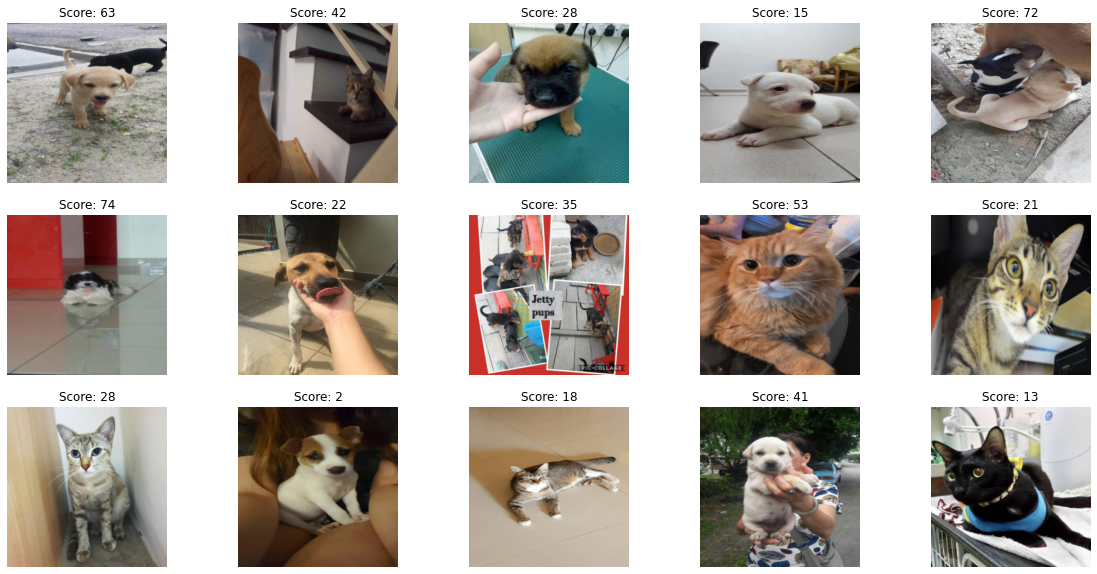

In [15]:
fig, ax = plt.subplots(3,5,figsize=(20,10))
count=0
for i in range(3):
    for j in range(5):
        ax[i][j].imshow(np.transpose(x_train[count], (1, 2, 0)))
        ax[i][j].axis('off')
        label = y[count]
        ax[i][j].set_title(f'Score: {label}')
        count+=1  

In [115]:
model=nn.Sequential(nn.Conv2d(3,64,3,stride=1,padding=1),
                    nn.Conv2d(64,64,3,stride=1,padding=1),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Conv2d(64,128,3,stride=1,padding=1),
                    nn.ReLU(),
                    nn.Conv2d(128,128,3,stride=1,padding=1),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2,stride=2),
                    nn.Conv2d(128,256,3,stride=1,padding=1),
                    nn.ReLU(),
                    nn.Conv2d(256,256,3,stride=1,padding=1),
                    nn.ReLU(),
                    nn.Conv2d(256,256,3,stride=1,padding=1),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2,stride=2),
                    nn.Conv2d(256,512,3,stride=1,padding=1),
                    nn.Conv2d(512,512,3,stride=1,padding=1),
                    nn.MaxPool2d(kernel_size=2,stride=2),
                    nn.Conv2d(512,512,3,stride=1,padding=1),
                    nn.Conv2d(512,512,3,stride=1,padding=1),
                    nn.MaxPool2d(kernel_size=2,stride=2),
                    nn.Flatten(),
                    nn.Linear(in_features=32768,out_features=4096),
                    nn.ReLU(),
                    nn.Dropout(p=0.2),
                    nn.Linear(4096,2048),
                    nn.ReLU(),
                    nn.Dropout(p=0.2),
                    nn.Linear(2048,1024),
                    nn.ReLU(),
                    nn.Dropout(p=0.2),
                    nn.Linear(1024,512),
                    nn.ReLU(),
                    nn.Linear(512,1),
                    #nn.ReLU()
                    #nn.Flatten()
                   # #nn.Linear(,),
                   # nn.Dropout(p=0.5),
                   # nn.Linear(,10)
                   )


In [45]:
start=time.time()
aa=model(x_train)
end=time.time()

In [116]:
loss_fn = nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=1e-3,weight_decay=0.00001)

In [117]:
start=time.time()
epochs=1
for epoch in range(epochs):
    for batch, (x,y) in enumerate(tqdm(train_loader,desc="Iteration")):
        #print(batch)
        model.train()
        x_train=x[0]
        y_pred=model(x_train)
        loss=loss_fn(y_pred.reshape(32).float(),y.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if(batch==3):
            break
end=time.time()

Iteration:   1%|▎                             | 3/310 [02:52<4:54:30, 57.56s/it]


In [119]:
loss

tensor(6877.7783, grad_fn=<MseLossBackward>)

In [45]:
class WangNet(nn.Module):
    def __init__(self):
        super(WangNet,self).__init__()
        self.block1=nn.Sequential(
            nn.Conv2d(3,64,3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(64,64,3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(64,64,3,stride=1,padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64,affine=True),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.block2=nn.Sequential(nn.Conv2d(64,128,3,stride=1,padding=1),
                                  nn.ReLU(),
                                  nn.Conv2d(128,128,3,stride=1,padding=1),
                                  nn.ReLU(),
                                  nn.Conv2d(128,128,3,stride=1,padding=1),
                                  nn.ReLU(),
                                  nn.BatchNorm2d(128,affine=True),
                                  nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.block3=nn.Sequential(nn.Conv2d(128,256,3,stride=1,padding=1),
                                  nn.ReLU(),
                                  nn.Conv2d(256,256,3,stride=1,padding=1),
                                  nn.ReLU(),
                                  nn.Conv2d(256,256,3,1,1),
                                  nn.ReLU(),
                                  nn.BatchNorm2d(256,affine=True),
                                  nn.MaxPool2d(2,2)
            
        )
        self.block4=nn.Sequential(nn.Conv2d(256,512,3,stride=1,padding=1),
                                  nn.ReLU(),
                                  nn.Conv2d(512,512,3,stride=1,padding=1),
                                  nn.ReLU(),
                                  nn.MaxPool2d(2,2),
                                  nn.Conv2d(512,512,3,1,1),
                                  nn.ReLU(),
                                  nn.BatchNorm2d(512,affine=True),
                                  nn.MaxPool2d(kernel_size=2, dilation=2)
        )
        self.block5=nn.Sequential(
                                  nn.Linear(512*7*7,256),
                                  nn.Dropout(p=0.3),
                                  nn.Linear(256,1)
            
        )
    def forward(self,x):
        x=self.block1(x)
        x=self.block2(x)
        x=self.block3(x)
        x=self.block4(x)
        x1=x.view(-1,512*7*7)
        x1=self.block5(x1)
        return x1,x

In [46]:
model=WangNet()
out1,out2=model(x_train)